# Country contribution

In [1]:
import xml.etree.ElementTree as et
import pandas as pd
from matplotlib.pyplot import savefig
from matplotlib import rcParams
from nltk.tokenize import word_tokenize 

# Parsing XML file

In [2]:
def extract_country(affiliation):
    countries = ["afghanistan","albania","algeria","andorra","angola","antigua and barbuda","argentina",
                 "armenia","australia","austria","azerbaijan","the bahamas","bahrain","bangladesh","barbados",
                 "belarus","belgium","belize","benin","bhutan","bolivia","bosnia and herzegovina","botswana",
                 "brazil","brunei","bulgaria","burkina_faso","burundi","cabo verde","cambodia","cameroon","canada",
                 "central african republic","chad","chile","china","colombia","comoros",
                 "democratic republic of the congo","republic of the congo","costa_rica","côte d’ivoire","croatia",
                 "cuba","cyprus","czech_republic","denmark","djibouti","dominica","dominican_republic",
                 "east timor (timor-leste)","ecuador","egypt","el salvador","equatorial guinea","eritrea",
                 "estonia","eswatini","ethiopia","fiji","finland","france","gabon","the gambia","georgia",
                 "germany","ghana","greece","grenada","guatemala","guinea","guinea-bissau","guyana","haiti",
                 "honduras","hungary","iceland","india","indonesia","iran","iraq","ireland","israel","italy",
                 "jamaica","japan","jordan","kazakhstan","kenya","kiribati","north_korea","south_korea","kosovo",
                 "kuwait","kyrgyzstan","laos","latvia","lebanon","lesotho","liberia","libya","liechtenstein",
                 "lithuania","luxembourg","madagascar","malawi","malaysia","maldives","mali","malta",
                 "marshall islands","mauritania","mauritius","mexico","federated states of micronesia","moldova",
                 "monaco","mongolia","montenegro","morocco","mozambique","myanmar (burma)","namibia","nauru",
                 "nepal","netherlands","new_zealand","nicaragua","niger","nigeria","north macedonia","norway",
                 "oman","pakistan","palau","panama","papua new guinea","paraguay","peru","philippines","poland",
                 "portugal","qatar","romania","russia","rwanda","saint kitts and nevis","saint lucia",
                 "saint vincent and the grenadines","samoa","san marino","sao tome and principe","saudi_arabia",
                 "senegal","serbia","seychelles","sierra leone","singapore","slovakia","slovenia",
                 "solomon islands","somalia","south_africa","spain","sri lanka","sudan","south sudan","suriname",
                 "sweden","switzerland","syria","taiwan","tajikistan","tanzania","thailand","togo","tonga",
                 "trinidad and tobago","tunisia","turkey","turkmenistan","tuvalu","uganda","ukraine",
                 "united arab emirates","uk","usa","uruguay","uzbekistan","vanuatu","vatican city","venezuela",
                 "vietnam","yemen","zambia","zimbabwe"]
    substitutions = {"republic of korea":"south_korea",
                    "south korea":"south_korea",
                    "daegu":"south_korea",
                    "seoul":"south_korea",
                    "cheonan":"south_korea",
                    "taejon":"south_korea",
                    "taejeon":"south_korea",
                    "daejeon":"south_korea",
                    "gyeongsang":"south_korea",
                    "kacc":"south_korea",
                    "suwon":"south_korea",
                    "korean agricultural culture collection":"south_korea",
                    "incheon":"south_korea",
                    "yongin":"south_korea",
                    "bio-max institute":"south_korea",
                    "kyung hee university":"south_korea",
                    "gangneung":"south_korea",
                    "kyung hee":"south_korea",
                    "anseong":"south_korea",
                    "cheongju":"south_korea",
                    "ansan":"south_korea",
                    "busan":"south_korea",
                    "chuncheon":"south_korea",
                    "south africa":"south_africa",
                    "united kingdom":"uk",
                    "united states of america":"usa",
                    "university of minnesota":"usa",
                    "department of biological sciences, life sciences building":"usa",
                    "puerto rico":"usa",
                    "russian federation":"russia",
                    "russian academy of sciences":"russia",
                    "moscow":"russia",
                    "czech republic":"czech_republic",
                    "saudi arabia": "saudi_arabia",
                    "beijing":"china",
                    "prchina":"china",
                    "hong kong":"china",
                    "sichuan":"china",
                    "henan university of technology":"china",
                    "dominican republic":"dominican_republic",
                    "costa rica":"costa_rica",
                    "new zealand":"new_zealand",
                    "bern":"switzerland",
                    "algerie":"algeria",
                    "méxico":"mexico",
                    "nihon":"japan",
                    "department of translational research":"japan",
                    "kagoshima":"japan",
                    "azabu":"japan",
                    "centre-nkolbisson":"cameroon",
                    "new caledonia":"france",
                    "marseille":"france",
                    "cpoyart@pasteur.fr":"france",
                    "tunisie":"tunisia",
                    "algérie":"algeria",
                    "bénin":"benin",
                    "slovak republic":"slovakia",
                    "burkina faso":"burkina_faso",
                    "braunschweig":"germany",
                    "bergholz-rehbrücke":"germany",
                    "bergholz-rehbrucke":"germany",
                    "uppsala":"sweden"}
    for i,j in substitutions.items():
        affiliation = affiliation.lower().replace(i,j)
    word_tokens = word_tokenize(affiliation) 
    for word in word_tokens:
        if word in countries:
            country = word
            break
    return(country)
            
            
            
        

In [3]:
tree = et.parse("sp_nov_2001_2018_pubmed_16012019_ed.xml") #loading xml file
root = tree.getroot()

In [4]:
with open("tabela_countries.txt", "w") as file:
    file.write("Journal" + "\t" + "Article Title" + "\t" + "Year" + "\t" + "Affiliation_FA" + "\t" + "Country_FA" 
               "\t" + "Affiliation_LA" + "\t" + "Country_LA" + "\n")
    for article_set in root.findall("PubmedArticleSet"):
        for pubmed_article in article_set.findall("PubmedArticle"):
            for medline_citation in pubmed_article.findall("MedlineCitation"):
                for article in medline_citation.findall("Article"):
                    title = article.find("ArticleTitle").text
                    for author_list in article.findall("AuthorList"):
                        first_author = author_list[0]
                        aff_info_FA = first_author.find("AffiliationInfo")
                        last_author = author_list[-1]
                        aff_info_LA = last_author.find("AffiliationInfo")                        
                        try:
                            affiliation_FA = aff_info_FA.find("Affiliation").text
                        except:
                            affiliation_FA = ""
                        try:
                            country_FA = extract_country(affiliation_FA) #only country of last affiliation is extracted
                        except:
                            country_FA = ""
                        try:
                            affiliation_LA = aff_info_LA.find("Affiliation").text
                        except:
                            affiliation_LA = ""
                        try:
                            country_LA = extract_country(affiliation_LA) #only country of last affiliation is extracted
                        except:
                            country_LA = ""                      
                    for journal in article.findall("Journal"):
                        journal_title = journal.find("Title").text
                        for journal_issue in journal.findall("JournalIssue"):
                            for pubdate in journal_issue.findall("PubDate"):
                                try:
                                    year = pubdate.find("Year").text
                                    pass
                                except:
                                    year = pubdate.find("MedlineDate").text.split(" ")[0]
                                file.write(journal_title + "\t" + title + "\t" + year + "\t" + affiliation_FA + 
                                           "\t" + str(country_FA) + "\t" + affiliation_LA + "\t" + str(country_LA) + "\n")


            

In [5]:
df = pd.read_csv("tabela_countries.txt", sep="\t")
df


,Journal,Article Title,Year,Affiliation_FA,Country_FA,Affiliation_LA,Country_LA
0,"Journal of microbiology (Seoul, Korea)","Mediterraneibacter butyricigenes sp. nov., a b...",2019,"Korean Collection for Type Cultures, Biologica...",south_korea,"Korean Collection for Type Cultures, Biologica...",south_korea
1,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,"2​Freshwater Bioresources Research Bureau, Nak...",south_korea,"1​Department of Biological Sciences, Inha Univ...",south_korea
2,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,"1​State Key Laboratory of Microbial Resources,...",china,"5​College of Life Sciences, University of Chin...",china
3,"Journal of microbiology (Seoul, Korea)","Gramella fulva sp. nov., isolated from a dry s...",2019,"Department of Biology, College of Natural Scie...",south_korea,"Department of Microbiology, College of Natural...",south_korea
4,"Journal of microbiology (Seoul, Korea)","Flavisolibacter aluminii sp. nov., a novel mem...",2019,Department of Agricultural Biotechnology and R...,south_korea,Department of Agricultural Biotechnology and R...,south_korea
5,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,"1​Institute of Biochemistry and Biophysics, Po...",poland,"1​Institute of Biochemistry and Biophysics, Po...",poland
6,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,1​Microbe Division/Japan Collection of Microor...,japan,1​Microbe Division/Japan Collection of Microor...,japan
7,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,"1​Center of Infectious Diseases, West China Ho...",china,"2​Division of Infectious Diseases, State Key L...",china
8,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",2018,"1​Center of Infectious Diseases, West China Ho...",china,"1​Center of Infectious Diseases, West China Ho...",china
9,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",2018,1​Key Laboratory of Agriculture Biological Fun...,china,1​Key Laboratory of Agriculture Biological Fun...,china


In [6]:
df = df.drop(index=0).reset_index(drop=True)  # the first record (Mediterraneibacter butyricigenes) was dropped since it was not found in the table generated from the medline file
df

,Journal,Article Title,Year,Affiliation_FA,Country_FA,Affiliation_LA,Country_LA
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,"2​Freshwater Bioresources Research Bureau, Nak...",south_korea,"1​Department of Biological Sciences, Inha Univ...",south_korea
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,"1​State Key Laboratory of Microbial Resources,...",china,"5​College of Life Sciences, University of Chin...",china
2,"Journal of microbiology (Seoul, Korea)","Gramella fulva sp. nov., isolated from a dry s...",2019,"Department of Biology, College of Natural Scie...",south_korea,"Department of Microbiology, College of Natural...",south_korea
3,"Journal of microbiology (Seoul, Korea)","Flavisolibacter aluminii sp. nov., a novel mem...",2019,Department of Agricultural Biotechnology and R...,south_korea,Department of Agricultural Biotechnology and R...,south_korea
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,"1​Institute of Biochemistry and Biophysics, Po...",poland,"1​Institute of Biochemistry and Biophysics, Po...",poland
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,1​Microbe Division/Japan Collection of Microor...,japan,1​Microbe Division/Japan Collection of Microor...,japan
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,"1​Center of Infectious Diseases, West China Ho...",china,"2​Division of Infectious Diseases, State Key L...",china
7,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",2018,"1​Center of Infectious Diseases, West China Ho...",china,"1​Center of Infectious Diseases, West China Ho...",china
8,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",2018,1​Key Laboratory of Agriculture Biological Fun...,china,1​Key Laboratory of Agriculture Biological Fun...,china
9,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",2018,"1​Fisheries College, Guangdong Ocean Universit...",china,"3​College of Fisheries, Henan Normal Universit...",china


In [7]:
df_elegibles = pd.read_csv("table_1_eligible.csv", index_col=0)
df_elegibles

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."
7,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",['Wu Wenjing' 'Feng Yu' 'Zong Zhiyong'],2018,"An Enterobacter strain, WCHECL1597(T), was rec..."
8,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",['Song Wei' 'Duan Liping' 'Zhao Junwei' 'Jiang...,2018,"A novel actinobacterium, designated strain NEA..."
9,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",['Xue Ming' 'Wen Chong-Qing' 'Liu Lan' 'Fang B...,2018,"Two Gram-stain negative, moderately halophilic..."
10,International journal of systematic and evolut...,"Alsobacter soli sp. nov., a novel bacterium is...",['Sun Lina' 'Liu Hongming' 'Chen Wei' 'Huang K...,2018,"Strain SH9(T), an aerobic bacterium isolated f..."
11,International journal of systematic and evolut...,"Microbacterium halophytorum sp. nov., a novel ...",['Li Yan-Ru' 'Zhu Zhi-Nan' 'Li Yu-Qian' 'Xiao ...,2018,"Two actinobacterial strains, YJYP 303(T) and Y..."


In [8]:
df = df[df.index.isin(df_elegibles.index)] #filter the occurences in df based on indexes of eligible records
df.to_csv("table_1_eligible_country.csv")
df

,Journal,Article Title,Year,Affiliation_FA,Country_FA,Affiliation_LA,Country_LA
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,"2​Freshwater Bioresources Research Bureau, Nak...",south_korea,"1​Department of Biological Sciences, Inha Univ...",south_korea
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,"1​State Key Laboratory of Microbial Resources,...",china,"5​College of Life Sciences, University of Chin...",china
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,"1​Institute of Biochemistry and Biophysics, Po...",poland,"1​Institute of Biochemistry and Biophysics, Po...",poland
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,1​Microbe Division/Japan Collection of Microor...,japan,1​Microbe Division/Japan Collection of Microor...,japan
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,"1​Center of Infectious Diseases, West China Ho...",china,"2​Division of Infectious Diseases, State Key L...",china
7,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",2018,"1​Center of Infectious Diseases, West China Ho...",china,"1​Center of Infectious Diseases, West China Ho...",china
8,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",2018,1​Key Laboratory of Agriculture Biological Fun...,china,1​Key Laboratory of Agriculture Biological Fun...,china
9,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",2018,"1​Fisheries College, Guangdong Ocean Universit...",china,"3​College of Fisheries, Henan Normal Universit...",china
10,International journal of systematic and evolut...,"Alsobacter soli sp. nov., a novel bacterium is...",2018,1​Eco-Environmental Protection Research Instit...,china,1​Eco-Environmental Protection Research Instit...,china
11,International journal of systematic and evolut...,"Microbacterium halophytorum sp. nov., a novel ...",2018,1​Xinjiang Key Laboratory of Special Species C...,china,6​Key Laboratory of Biogeography and Bioresour...,china


In [9]:
df[df["Country_FA"].isna()].info() #48 itens do not present the affiliation of the first author

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1907 to 8417
Data columns (total 7 columns):
Journal           48 non-null object
Article Title     48 non-null object
Year              48 non-null int64
Affiliation_FA    0 non-null object
Country_FA        0 non-null object
Affiliation_LA    0 non-null object
Country_LA        0 non-null object
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [10]:
df[df["Country_LA"].isna()] #6389 itens do not present the affiliation of the last author

,Journal,Article Title,Year,Affiliation_FA,Country_FA,Affiliation_LA,Country_LA
1222,Microbes and environments,"Streptomyces cameroonensis sp. nov., a Geldana...",2017,Laboratory of Phytoprotection and Valorization...,cameroon,NaN,NaN
1239,Diseases of aquatic organisms,Novel urease-negative Helicobacter sp. 'H. enh...,2017,"Division of Comparative Medicine, Massachusett...",usa,NaN,NaN
1907,Mikrobiologiia,"[Desulfovibrio hontreensis sp. nov., a Sulfate...",2015,NaN,NaN,NaN,NaN
2044,International journal of systematic and evolut...,"Tumebacillus lipolyticus sp. nov., isolated fr...",2015,NaN,NaN,NaN,NaN
2273,Current microbiology,Lysobacter chengduensis sp. nov. Isolated from...,2016,NaN,NaN,NaN,NaN
2276,International journal of systematic and evolut...,"Alicyclobacillus fodiniaquatilis sp. nov., iso...",2015,NaN,NaN,NaN,NaN
2283,Extremophiles : life under extreme conditions,"Halopeptonella vilamensis gen. nov, sp. nov., ...",2016,"Cátedra de Microbiología, Departamento de Bioc...",uruguay,NaN,NaN
2308,International journal of systematic and evolut...,"Plantactinospora sonchi sp. nov., an actinobac...",2015,NaN,NaN,NaN,NaN
2312,International journal of systematic and evolut...,"Roseomonas oryzicola sp. nov., isolated from t...",2015,NaN,NaN,NaN,NaN
2320,International journal of systematic and evolut...,"Streptobacillus notomytis sp. nov., isolated f...",2015,NaN,NaN,NaN,NaN


In [23]:
#final table
final_table = pd.merge(df, df_elegibles, left_index=True, right_index=True)
final_table.to_csv("final_table.csv", sep="\t")

# Plots

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df["Country_FA"].value_counts() #First author statistics

china                 2320
south_korea           2117
japan                  807
germany                591
india                  441
usa                    438
spain                  345
russia                 313
france                 270
taiwan                 242
uk                     205
thailand               159
belgium                158
australia               87
portugal                84
austria                 73
brazil                  63
italy                   61
czech_republic          58
denmark                 54
iran                    53
netherlands             53
canada                  52
turkey                  50
south_africa            42
hungary                 35
mexico                  35
algeria                 34
switzerland             33
finland                 29
                      ... 
mongolia                 9
morocco                  9
saudi_arabia             9
colombia                 8
greece                   7
egypt                    7
u

In [13]:
df["Country_LA"].value_counts() #First author statistics

china             1081
south_korea        836
japan              190
germany            158
india              143
usa                104
spain              101
taiwan              86
france              75
thailand            61
uk                  51
russia              50
brazil              31
belgium             28
austria             25
portugal            22
czech_republic      22
italy               20
malaysia            16
hungary             16
turkey              15
netherlands         15
denmark             13
australia           13
tunisia             12
canada              11
switzerland         10
norway               7
south_africa         6
sweden               6
chile                6
mexico               6
georgia              6
algeria              6
mongolia             6
poland               4
argentina            4
new_zealand          3
colombia             3
ireland              3
kuwait               2
slovenia             2
uruguay              2
saudi_arabi

In [14]:
#Todos
all_papers_by_year = pd.DataFrame(df["Year"].value_counts().reset_index())
all_papers_by_year.columns = ['year', 'count']
all_papers_by_year_sorted = all_papers_by_year.sort_values(by="year").reset_index(drop=True)
all_papers_by_year_sorted['cum_sum'] = all_papers_by_year_sorted["count"].cumsum()
all_papers_by_year_sorted

,year,count,cum_sum
0,2001,178,178
1,2002,231,409
2,2003,263,672
3,2004,325,997
4,2005,373,1370
5,2006,415,1785
6,2007,498,2283
7,2008,481,2764
8,2009,525,3289
9,2010,524,3813


In [15]:
#china
china = df[df["Country_FA"] == "china"]
china_papers_by_year = pd.DataFrame(china["Year"].value_counts().reset_index())
china_papers_by_year.columns = ['year', 'count']
china_papers_by_year_sorted = china_papers_by_year.sort_values(by="year").reset_index(drop=True)
china_papers_by_year_sorted['cum_sum'] = china_papers_by_year_sorted["count"].cumsum()
china_papers_by_year_sorted["proportion"] = china_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
china_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,7,7,0.039326
1,2002,15,22,0.064935
2,2003,15,37,0.057034
3,2004,24,61,0.073846
4,2005,43,104,0.115282
5,2006,35,139,0.084337
6,2007,52,191,0.104418
7,2008,77,268,0.160083
8,2009,131,399,0.249524
9,2010,94,493,0.179389


In [16]:
#korea
korea = df[df["Country_FA"] == "south_korea"]
korea_papers_by_year = pd.DataFrame(korea["Year"].value_counts().reset_index())
korea_papers_by_year.columns = ['year', 'count']
korea_papers_by_year_sorted = korea_papers_by_year.sort_values(by="year").reset_index(drop=True)
korea_papers_by_year_sorted['cum_sum'] = korea_papers_by_year_sorted["count"].cumsum()
korea_papers_by_year_sorted["proportion"] = korea_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
korea_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,9,9,0.050562
1,2002,12,21,0.051948
2,2003,19,40,0.072243
3,2004,34,74,0.104615
4,2005,61,135,0.163539
5,2006,96,231,0.231325
6,2007,139,370,0.279116
7,2008,127,497,0.264033
8,2009,103,600,0.196190
9,2010,121,721,0.230916


In [17]:
japan = df[df["Country_FA"] == "japan"]
japan_papers_by_year = pd.DataFrame(japan["Year"].value_counts().reset_index())
japan_papers_by_year.columns = ['year', 'count']
japan_papers_by_year_sorted = japan_papers_by_year.sort_values(by="year").reset_index(drop=True)
japan_papers_by_year_sorted['cum_sum'] = japan_papers_by_year_sorted["count"].cumsum()
japan_papers_by_year_sorted["proportion"] = japan_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
japan_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,16,16,0.089888
1,2002,29,45,0.125541
2,2003,31,76,0.117871
3,2004,40,116,0.123077
4,2005,42,158,0.112601
5,2006,44,202,0.106024
6,2007,82,284,0.164659
7,2008,55,339,0.114345
8,2009,54,393,0.102857
9,2010,52,445,0.099237


In [18]:
germany = df[df["Country_FA"] == "germany"]
germany_papers_by_year = pd.DataFrame(germany["Year"].value_counts().reset_index())
germany_papers_by_year.columns = ['year', 'count']
germany_papers_by_year_sorted = germany_papers_by_year.sort_values(by="year").reset_index(drop=True)
germany_papers_by_year_sorted['cum_sum'] = germany_papers_by_year_sorted["count"].cumsum()
germany_papers_by_year_sorted["proportion"] = germany_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
germany_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,25,25,0.140449
1,2002,32,57,0.138528
2,2003,25,82,0.095057
3,2004,26,108,0.080000
4,2005,21,129,0.056300
5,2006,38,167,0.091566
6,2007,35,202,0.070281
7,2008,29,231,0.060291
8,2009,33,264,0.062857
9,2010,39,303,0.074427


In [19]:
#india
india = df[df["Country_FA"] == "india"]
india_papers_by_year = pd.DataFrame(india["Year"].value_counts().reset_index())
india_papers_by_year.columns = ['year', 'count']
india_papers_by_year_sorted = india_papers_by_year.sort_values(by="year").reset_index(drop=True)
india_papers_by_year_sorted['cum_sum'] = india_papers_by_year_sorted["count"].cumsum()
india_papers_by_year_sorted["proportion"] = india_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
india_papers_by_year_sorted

india_papers_by_year_sorted.loc[-1] = [2001, 0, 0, 0]  # adding a row
india_papers_by_year_sorted.index = india_papers_by_year_sorted.index + 1  # shifting index
india_papers_by_year_sorted = india_papers_by_year_sorted.sort_index()  

india_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,0,0,0.000000
1,2002,3,3,0.016854
2,2003,5,8,0.021645
3,2004,7,15,0.026616
4,2005,14,29,0.043077
5,2006,25,54,0.067024
6,2007,17,71,0.040964
7,2008,18,89,0.036145
8,2009,20,109,0.041580
9,2010,31,140,0.059048


# Figure 4

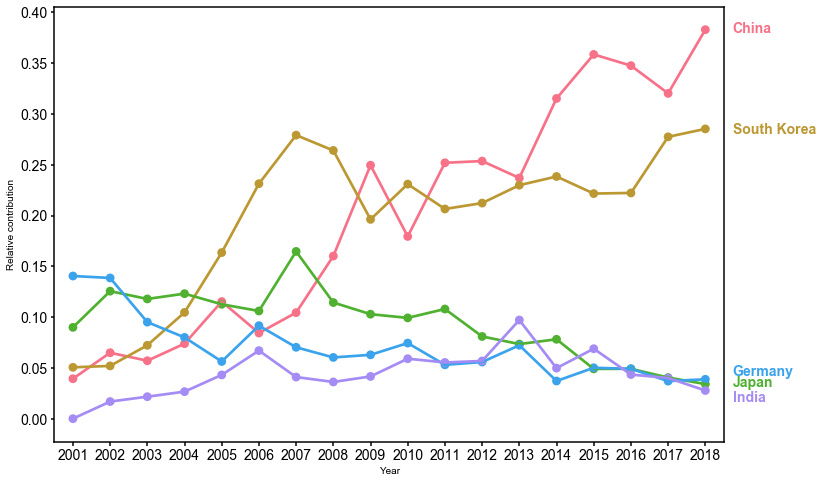

In [20]:
#Proportion of number of papers by year considering first author country affiliation

fig, ax = plt.subplots(figsize=(12,8))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

data_set = [china_papers_by_year_sorted, korea_papers_by_year_sorted, japan_papers_by_year_sorted, germany_papers_by_year_sorted, india_papers_by_year_sorted]
country_FA_set = ["China", "South Korea", "Japan", "Germany", "India"]
#color_set = sns.color_palette("cubehelix")
color_set = ["#f77189", "#bb9832", "#50b131", "#3ba3ec", "#a48cf4"]
y_set = [0.835, 0.66, 0.22, 0.24, 0.195]


for d, c, i, y_pos in zip(data_set, country_FA_set, color_set, y_set):
    sns.pointplot(x="year", y="proportion", data = d, color = i)
    fig.text(x = 0.91, y = y_pos, s = c, weight = "bold", family='sans-serif', fontsize=14, color = i)

#ax.set_ylim([0,0.4])
ax.set_ylabel("Relative contribution")
ax.set_xlabel("Year")

ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig.savefig("relative_country_FA.svg")
plt.show()


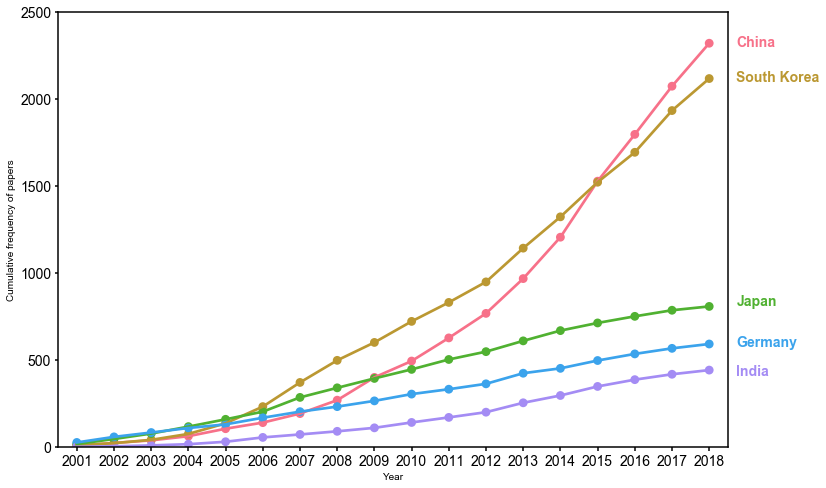

In [21]:
#Cumulative number of papers by year considering first author Country_FA affiliation

fig, ax = plt.subplots(figsize=(12,8))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

data_set = [china_papers_by_year_sorted, korea_papers_by_year_sorted, japan_papers_by_year_sorted, germany_papers_by_year_sorted, india_papers_by_year_sorted]
country_FA_set = ["China", "South Korea", "Japan", "Germany", "India"]
#color_set = sns.color_palette("cubehelix")
color_set = ["#f77189", "#bb9832", "#50b131", "#3ba3ec", "#a48cf4"]
y_set = [0.82, 0.76, 0.37, 0.30, 0.25]


for d, c, i, y_pos in zip(data_set, country_FA_set, color_set, y_set):
    sns.pointplot(x="year", y="cum_sum", data = d, color = i)
    fig.text(x = 0.91, y = y_pos, s = c, weight = "bold", family='sans-serif', fontsize=14, color = i)


ax.set_ylim([0,2500])
ax.set_ylabel("Cumulative frequency of papers")
ax.set_xlabel("Year")

ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig.savefig("cumulative_Country_FA.svg")
plt.show()